In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/raw/train.csv', low_memory=False)

In [6]:
threshold = 50000

# Drop columns with fewer non-null values than the threshold
filtered_data = df.dropna(axis=1, thresh=threshold)

# Save the filtered data to a new CSV file
filtered_data.to_csv('../data/interim/filtered_data.csv', index=False)

In [7]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [8]:
# Fill missing values in numerical columns with the median
numerical_columns = [
    'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
    'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
    'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag',
    'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
    'ast', 'stl', 'blk', 'pts'
]

filtered_data.loc[:, numerical_columns] = filtered_data.loc[:, numerical_columns].fillna(filtered_data[numerical_columns].median())

# Fill missing values in categorical columns with the mode
categorical_columns = ['yr', 'ht', 'num']

for col in categorical_columns:
    filtered_data[col].fillna(filtered_data[col].mode()[0], inplace=True)


/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_36717/233104502.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col].fillna(filtered_data[col].mode()[0], inplace=True)


In [9]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [10]:
#Dropping the 'year' column as it doesn't seem to add value to the overall model prediction. 
def process(df):
    df.drop('year', axis=1, inplace=True)
    return df
filtered_data = process(filtered_data)
filtered_data

/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_36717/4232203048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('year', axis=1, inplace=True)


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,Niagara,MAAC,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,...,-17.439600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9eded9ee-0eb4-49f4-914a-f58924797bdf,0.0
56087,Northwestern St.,Slnd,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,...,9.392350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,5b539feb-1736-44ed-ba62-82bce86b12d6,0.0
56088,Texas Southern,SWAC,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,...,-3.240610,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,e95d08eb-1273-4094-9173-c47368222c0d,0.0
56089,Vanderbilt,SEC,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,...,16.362500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,2f315a7b-2e82-44a2-8597-1779102ace09,0.0


In [11]:
#From a contextual understanding/domain knowledge and upon further research, none of the below mentioned features would help with the model outcome. 
def process(df):
    columns_to_drop = ['yr', 'ht', 'num', 'team', 'conf', 'type', 'player_id']
    df.drop(columns_to_drop, axis=1, inplace=True)
    return df

filtered_data = process(filtered_data)
filtered_data


/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_36717/3560785904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns_to_drop, axis=1, inplace=True)


,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,...,-22.468800,-17.439600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,...,35.683300,9.392350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0
56088,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,...,-13.372700,-3.240610,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0
56089,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,...,94.422600,16.362500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0


In [12]:
y = filtered_data.pop('drafted')

In [13]:
X = filtered_data

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (33654, 50)
Validation set: (11218, 50)
Test set: (11219, 50)


In [15]:
# Check class distribution for each set
train_class_distribution = y_train.value_counts()
val_class_distribution = y_val.value_counts()
test_class_distribution = y_test.value_counts()

print("Train class distribution:")
print(train_class_distribution)

print("\nValidation class distribution:")
print(val_class_distribution)

print("\nTest class distribution:")
print(test_class_distribution)

Train class distribution:
drafted
0.0    33321
1.0      333
Name: count, dtype: int64

Validation class distribution:
drafted
0.0    11114
1.0      104
Name: count, dtype: int64

Test class distribution:
drafted
0.0    11120
1.0       99
Name: count, dtype: int64


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler and SMOTE
scaler = StandardScaler()
smote = SMOTE(random_state=42)

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Resample the scaled training set using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [17]:
# Resample the validation set
X_val_scaled = scaler.transform(X_val)
X_val_resampled, y_val_resampled = smote.fit_resample(X_val_scaled, y_val)

# Resample the test set
X_test_scaled = scaler.transform(X_test)

X_test_resampled, y_test_resampled = smote.fit_resample(X_test_scaled, y_test)


In [18]:
X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_val_resampled = pd.DataFrame(X_val_resampled, columns=X_val.columns)
X_test_resampled = pd.DataFrame(X_test_resampled, columns=X_test.columns)

# No need to specify columns for y_train_resampled, y_val_resampled, y_test_resampled
y_train_resampled = pd.Series(y_train_resampled)
y_val_resampled = pd.Series(y_val_resampled)
y_test_resampled = pd.Series(y_test_resampled)

# Save the DataFrames to CSV files
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val_resampled.to_csv('../data/processed/X_val.csv', index=False)
X_test_resampled.to_csv('../data/processed/X_test.csv', index=False)
y_train_resampled.to_csv('../data/processed/y_train.csv', index=False)
y_val_resampled.to_csv('../data/processed/y_val.csv', index=False)
y_test_resampled.to_csv('../data/processed/y_test.csv', index=False)
X_val_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22228 entries, 0 to 22227
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   22228 non-null  float64
 1   Min_per              22228 non-null  float64
 2   Ortg                 22228 non-null  float64
 3   usg                  22228 non-null  float64
 4   eFG                  22228 non-null  float64
 5   TS_per               22228 non-null  float64
 6   ORB_per              22228 non-null  float64
 7   DRB_per              22228 non-null  float64
 8   AST_per              22228 non-null  float64
 9   TO_per               22228 non-null  float64
 10  FTM                  22228 non-null  float64
 11  FTA                  22228 non-null  float64
 12  FT_per               22228 non-null  float64
 13  twoPM                22228 non-null  float64
 14  twoPA                22228 non-null  float64
 15  twoP_per             22228 non-null 

In [21]:
from joblib import dump

dump(scaler,  '../models/scaler.joblib')
dump(smote,  '../models/smote.joblib')

['../models/smote.joblib']

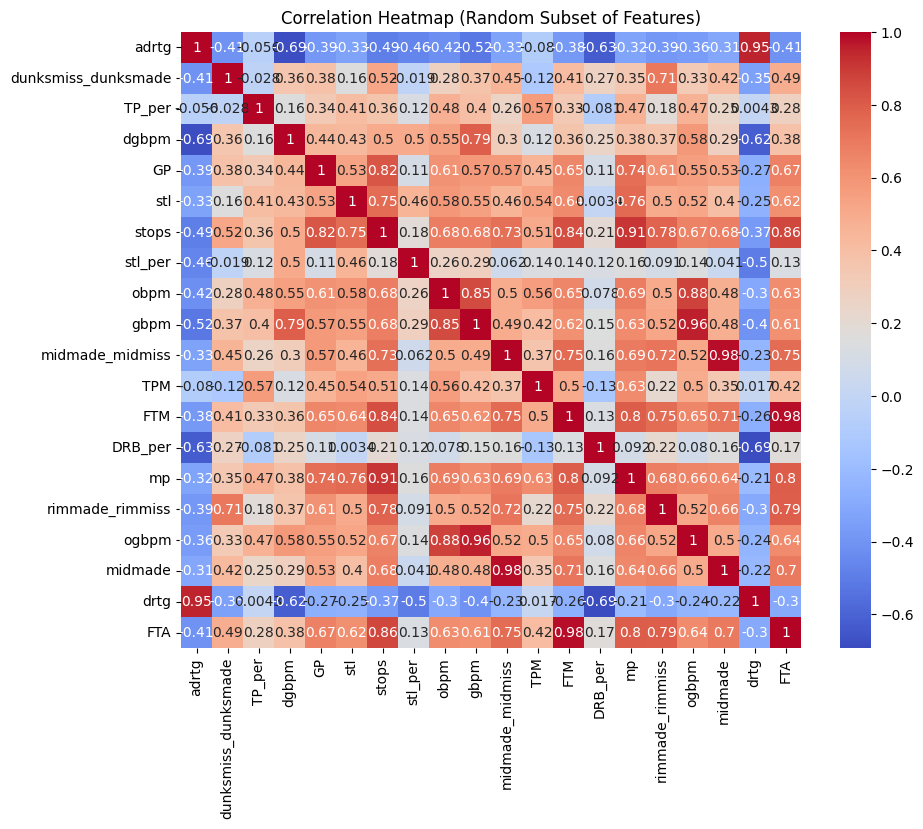

Pairs of Highly Correlated Features:
[('adrtg', 'drtg'), ('dunksmiss_dunksmade', 'rimmade_rimmiss'), ('dgbpm', 'gbpm'), ('GP', 'stops'), ('GP', 'mp'), ('stl', 'stops'), ('stl', 'mp'), ('stops', 'midmade_midmiss'), ('stops', 'FTM'), ('stops', 'mp'), ('stops', 'rimmade_rimmiss'), ('stops', 'FTA'), ('obpm', 'gbpm'), ('obpm', 'ogbpm'), ('gbpm', 'ogbpm'), ('midmade_midmiss', 'FTM'), ('midmade_midmiss', 'rimmade_rimmiss'), ('midmade_midmiss', 'midmade'), ('midmade_midmiss', 'FTA'), ('FTM', 'mp'), ('FTM', 'rimmade_rimmiss'), ('FTM', 'midmade'), ('FTM', 'FTA'), ('mp', 'FTA'), ('rimmade_rimmiss', 'FTA')]


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Convert resampled training data numpy array back to DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Calculate correlation matrix for resampled training data
correlation_matrix_train = X_train_resampled_df.corr()

# Randomly select 20 features for visualization
random_features = random.sample(list(correlation_matrix_train.columns), 20)
correlation_matrix_subset = correlation_matrix_train.loc[random_features, random_features]

# Create a heatmap of the subset of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Random Subset of Features)")
plt.show()

# Set a threshold for collinearity
threshold = 0.7

# Identify pairs of highly correlated features
collinear_pairs = []

for i in range(len(correlation_matrix_subset.columns)):
    for j in range(i + 1, len(correlation_matrix_subset.columns)):
        if abs(correlation_matrix_subset.iloc[i, j]) > threshold:
            collinear_pairs.append((correlation_matrix_subset.columns[i], correlation_matrix_subset.columns[j]))

print("Pairs of Highly Correlated Features:")
print(collinear_pairs)


In [23]:
import scipy.stats as stats

# Set a threshold for collinearity
threshold = 0.7

# Testing a few Pairs of highly correlated features to check if they are statistically significant using Hypothesis testing
collinear_pairs = [('GP', 'Min_per'), ('Min_per', 'FTM'), ('Min_per', 'FTA'), 
                   ('Min_per', 'twoPM'), ('Min_per', 'twoPA'), ('Min_per', 'porpag'), 
                   ('Ortg', 'eFG'), ('Ortg', 'TS_per'), ('Ortg', 'adjoe'), 
                   ('eFG', 'TS_per'), ('eFG', 'twoP_per'), ('eFG', 'adjoe'), 
                   ('TS_per', 'twoP_per'), ('TS_per', 'adjoe'), ('ORB_per', 'blk_per'), 
                   ('FTM', 'FTA'), ('FTM', 'twoPM'), ('FTM', 'twoPA'), 
                   ('FTM', 'porpag'), ('FTA', 'twoPM'), ('FTA', 'twoPA'), 
                   ('FTA', 'porpag'), ('twoPM', 'twoPA'), ('twoPM', 'porpag'), 
                   ('twoPA', 'porpag'), ('TPM', 'TPA'), ('porpag', 'adjoe')]

# Loop through each pair and perform Pearson correlation test
for feature1, feature2 in collinear_pairs:
    correlation_coefficient, p_value = stats.pearsonr(X_train_resampled_df[feature1], X_train_resampled_df[feature2])
    
    print(f"Pair: {feature1}, {feature2}")
    print("Pearson Correlation Coefficient:", correlation_coefficient)
    print("p-value:", p_value)
    
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")
    
    print()


Pair: GP, Min_per
Pearson Correlation Coefficient: 0.823162418126746
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, FTM
Pearson Correlation Coefficient: 0.8188542886581043
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, FTA
Pearson Correlation Coefficient: 0.8179265801251263
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, twoPM
Pearson Correlation Coefficient: 0.792367619175124
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, twoPA
Pearson Correlation Coefficient: 0.8338885179422565
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, porpag
Pearson Correlation Coefficient: 0.8128812541351709
p-value: 0.0
The correlation is statistically significant.

Pair: Ortg, eFG
Pearson Correlation Coefficient: 0.8037224116930332
p-value: 0.0
The correlation is statistically significant.

Pair: Ortg, TS_per
Pearson Correlation Coefficient: 0.8687657471083707
p-value: 0.

In [ ]:
#It seems that the p-values for all of the correlation tests are very close to 0, indicating that the observed correlations are statistically significant. 
#This suggests a strong linear relationship between the correlated features. Since the p-value is less than the commonly used significance level of 0.05, 
#we have enough evidence to reject the null hypothesis and conclude that these correlations are not due to random chance.